### Minimizing a Scalar Nonlinear Function with Gradient Descent

We minimize a simple nonlinear function  
\[
f(x) = x^4 - 3x^3 + 2
\]

using gradient descent.

We track **how the optimizer moves through x-space** and visualize
the optimization trajectory.


In [29]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Define the scalar nonlinear function
def f(x):
    return x**4 - 3*x**3 + 2 - 0.2*x

In [31]:
# Initial value
x = torch.tensor([-0.5], requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([x], lr=0.01)

# Store trajectory
x_history = []
y_history = []

In [32]:
n_steps = 250

for step in range(n_steps):
    optimizer.zero_grad()
    
    y = f(x)
    y.backward()
    
    optimizer.step()
    
    # Store trajectory
    x_history.append(x.item())
    y_history.append(y.item())

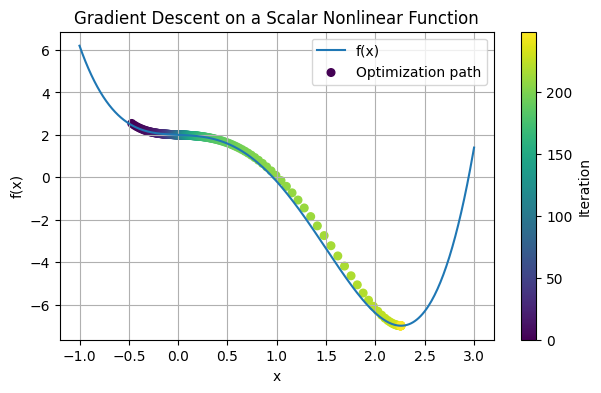

In [33]:
# Continuous function for plotting
xx = np.linspace(-1, 3, 400)
yy = f(torch.tensor(xx)).numpy()

plt.figure(figsize=(7,4))
plt.plot(xx, yy, label="f(x)")
plt.scatter(x_history, y_history, 
            c=range(len(x_history)), 
            cmap="viridis", 
            s=30,
            label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on a Scalar Nonlinear Function")
plt.colorbar(label="Iteration")
plt.legend()
plt.grid()
plt.savefig("minimization_visualization.png")
plt.show()